In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt



In [2]:
(imdb_train_original, imdb_validate_original, imdb_test_original), info = \
tfds.load(name='imdb_reviews/subwords8k',split=['train[:80%]', 'train[80%:]', 'test'], with_info=True, as_supervised=True)


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [4]:
reviews = np.array(
list(imdb_train_original.map(lambda review, label: review)))

print('Tatal', reviews.shape)
for index, review in enumerate(reviews[:16]):
    print(f'Index: {index} length: {review.shape[0]}')


Tatal (20000,)
Index: 0 length: 163
Index: 1 length: 142
Index: 2 length: 200
Index: 3 length: 117
Index: 4 length: 106
Index: 5 length: 421
Index: 6 length: 974
Index: 7 length: 188
Index: 8 length: 313
Index: 9 length: 179
Index: 10 length: 280
Index: 11 length: 394
Index: 12 length: 805
Index: 13 length: 241
Index: 14 length: 517
Index: 15 length: 125


In [5]:
lengths = [len(x) for x in reviews]
print('min', np.min(lengths))
print('max', np.max(lengths))
print('mean', np.mean(lengths))
print('median', np.std(lengths))

min 11
max 3944
mean 343.74655
median 264.46639732317124


(array([2.305e+03, 8.701e+03, 3.706e+03, 2.001e+03, 1.170e+03, 7.360e+02,
        4.770e+02, 3.010e+02, 2.170e+02, 1.490e+02, 1.110e+02, 7.900e+01,
        2.400e+01, 9.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  11. ,  142.1,  273.2,  404.3,  535.4,  666.5,  797.6,  928.7,
        1059.8, 1190.9, 1322. , 1453.1, 1584.2, 1715.3, 1846.4, 1977.5,
        2108.6, 2239.7, 2370.8, 2501.9, 2633. , 2764.1, 2895.2, 3026.3,
        3157.4, 3288.5, 3419.6, 3550.7, 3681.8, 3812.9, 3944. ]),
 <a list of 30 Patch objects>)

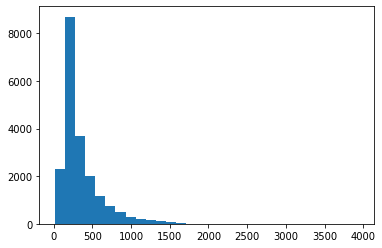

In [6]:
plt.hist(lengths, bins=30)

In [7]:
reviews[0].numpy()

array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
       5790,  995, 7968,    8,   52, 2948, 5240, 80

In [8]:
encoder = info.features['text'].encoder
print(f'Vocabulary size {encoder.vocab_size}')

Vocabulary size 8185


In [9]:
" ".join(encoder.subwords)

'the_ ,  .  a_ and_ of_ to_ s_ is_ br in_ I_ that_ this_ it_  /><  /> was_ The_ as_ t_ with_ for_ .< on_ but_ movie_  ( are_ his_ have_ film_ not_ ing_ be_ ed_ you_  " it d_ an_ he_ by_ at_ one_ who_ y_ from_ e_ or_ all_ like_ they_ "  so_ just_ has_ )  her_ about_ out_ This_ some_ ly_ movie film very_ more_ It_ would_ what_ when_ which_ good_ if_ up_ only_ even_ their_ had_ really_ my_ can_ no_ were_ see_ she_ ?  than_ !  there_ get_ been_ into_  -  will_ much_ story_ because_ ing time_ n_ we_ ed me_ :  most_ other_ don do_ m_ es_ how_ also_ make_ its_ could_ first_ any_ \'  people_ great_ ve_ ly er_ made_ r_ But_ think_  \' i_ bad_ A_ And_ It on ;  him_ being_ never_ way_ that many_ then_ where_ two_ In_ after_ too_ little_ you ),  well_ ng_ your_ If_ l_ ).  does_ ever_ them_ did_ watch_ know_ seen_ time er character_ over_ characters_ movies_ man_ There_ love_ best_ still_ off_ such_ in should_ the re_ He_ plot_ films_ go_ these_ acting_ doesn es show_ through_ better_ al_ something

In [10]:
text = 'Hello my dear friends'
print('original:', text)

text_encoded = encoder.encode(text)
print('Encoded:', text_encoded)
for i in text_encoded:
    print(encoder.subwords[i -1])

text_decoded = encoder.decode(text_encoded)
print('Decoded:', text_decoded)

original: Hello my dear friends
Encoded: [4025, 222, 82, 4946, 127, 1773]
Hell
o_
my_
dea
r_
friends
Decoded: Hello my dear friends


In [11]:
random_review, random_label = list(imdb_train_original.shuffle(1000).take(666))[0]
print(random_review.numpy())
print(random_label.numpy())
print(encoder.decode(random_review))

[ 407  372    1  678 6085 7961   50    1  101   50    1 6528 7961 5206
   24   10   16   10 6557 4899 2678  364   13    4 1234   83  374 6556
 4799  154   18  169 1257  201  529 5956 6556 4231  498   18   67 5149
 7104  201  143  276  126   84  471   50   56  614 3424 5158  667 6556
 2576 1113   18 2015 6334 6556 6107 7961   18  937  770 1177 1813 3525
  450 6556 4362   34   18  841  439  201  279   31   93   25 3162 6556
 4510    8   13 1502  481 3473  201 2665    2 4016    2  431  201   56
 1839 1402    8  105  439 6556  134    1  132 1276  201 3893   47 1437
 8041   90  249 7599  642   36   20   42  506  201   42   18    1  175
  357 2643    6  208    3 4106  189 7968   21  202  892   24   10   16
   10   17   19  814 1802 2668 7961   18   74   26   67 6217 6203  269
  201   20   18    1 1033   11 2679  955    6    1 1230  201  122  807
  259    5  824   24   10   16   10   17 2162 8007 7963  637 2619 6070
 8011 7962]
0
Not worth the video rental or the time or the occasional effort

In [12]:
dimensions = encoder.vocab_size

def encode(indices, label):
    indices = tf.dtypes.cast(indices, tf.int32)
    review_encoded = tf.one_hot(indices=indices, depth=dimensions)
    review_encoded = tf.reduce_max(review_encoded, 0)
    
    label_encoded = label
    return review_encoded, label_encoded

    

In [13]:
imdb_train = imdb_train_original.map(lambda review, label: encode(review, label)).cache()
imdb_validate = imdb_validate_original.map(lambda review, label: encode(review, label)).cache()
imdb_test = imdb_test_original.map(lambda review, label: encode(review, label)).cache()

In [14]:
random_review, random_label = list(imdb_train.shuffle(1000).take(1))[0]
print(random_review.shape)
print(random_review.numpy())
print(np.sum(random_review))
print(random_label)

(8185,)
[0. 1. 1. ... 0. 0. 0.]
108.0
tf.Tensor(1, shape=(), dtype=int64)


In [15]:
from tensorflow.keras import models, layers

In [31]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(dimensions,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                130976    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 131,265
Trainable params: 131,265
Non-trainable params: 0
_________________________________________________________________


In [32]:
review_indices, _ = list(imdb_train_original.take(1).as_numpy_iterator())[0]
review_decoded = encoder.decode(review_indices)
print(review_decoded)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


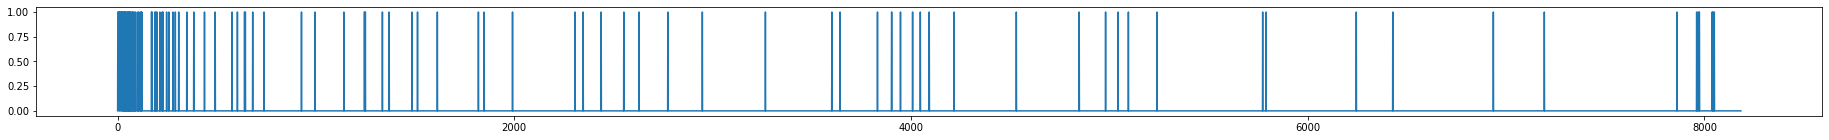

Expectation 0
prediction [0.49183726]


In [33]:
review_onehot, label = list(imdb_train.take(1).as_numpy_iterator())[0]
plt.figure(figsize=(32, 2))
plt.plot(review_onehot)
plt.show()
plt.close()
print('Expectation', label)

prediction = model.predict(np.array([review_onehot]))[0]
print('prediction', prediction)

In [34]:
loss, accuracy = model.evaluate(imdb_test.batch(512))
loss, accuracy

49/49 [==============================] - 0s 6ms/step - loss: 1.1856 - accuracy: 0.5078


(1.1856430768966675, 0.5078399777412415)

In [35]:
history = model.fit(imdb_train.shuffle(10000).batch(512), epochs=20, validation_data=imdb_validate.batch(32))

Epoch 1/20
40/40 [==============================] - 1s 15ms/step - loss: 0.8458 - accuracy: 0.7542 - val_loss: 0.6549 - val_accuracy: 0.8686
Epoch 2/20
40/40 [==============================] - 1s 14ms/step - loss: 0.5988 - accuracy: 0.8785 - val_loss: 0.5710 - val_accuracy: 0.8822
Epoch 3/20
40/40 [==============================] - 1s 14ms/step - loss: 0.5322 - accuracy: 0.8928 - val_loss: 0.5349 - val_accuracy: 0.8812
Epoch 4/20
40/40 [==============================] - 1s 14ms/step - loss: 0.4982 - accuracy: 0.8982 - val_loss: 0.5149 - val_accuracy: 0.8806
Epoch 5/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4707 - accuracy: 0.9049 - val_loss: 0.4988 - val_accuracy: 0.8806
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4542 - accuracy: 0.9089 - val_loss: 0.4921 - val_accuracy: 0.8798
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4400 - accuracy: 0.9104 - val_loss: 0.4802 - val_accuracy: 0.8788
Epoch 8/20
40

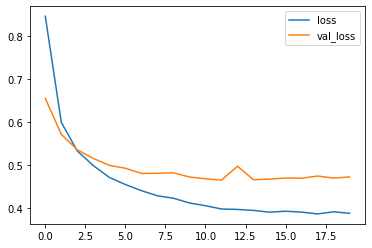

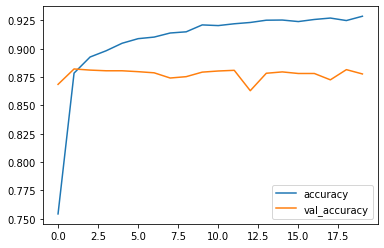

In [36]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [22]:
loss, accuracy  = model.evaluate(imdb_test.batch(32))
loss, accuracy

782/782 [==============================] - 17s 22ms/step - loss: 0.5020 - accuracy: 0.8589


(0.5020173192024231, 0.8588799834251404)